<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/estadistica/regresion_lineal_descenso_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Descent: How a Linear Regression Model Learns to Fit Data**

---

## 1. Introducción: ¿Qué problema queremos resolver?

En el corazón del Machine Learning y la Ciencia de Datos se encuentra una tarea fundamental: la **predicción**. Queremos usar datos que ya tenemos para hacer estimaciones inteligentes sobre datos que aún no hemos visto.

Empecemos con un ejemplo clásico y sencillo: **predecir el precio de una vivienda basándonos en su tamaño.**

Imagina que tenemos un conjunto de datos de casas. Para cada casa, conocemos su tamaño en metros cuadrados (nuestra variable $x$) y el precio final por el que se vendió (nuestra variable $y$). Si visualizamos estos datos en un gráfico, probablemente veremos una "nube de puntos" que tiende a ir hacia arriba: a más metros cuadrados, mayor es el precio.



Nuestro objetivo es trazar **una línea recta** que represente de la mejor forma posible la tendencia de esos puntos. Esta línea será nuestro "modelo" de Regresión Lineal. ¿Por qué? Porque una vez que tengamos esa línea, si alguien nos da un nuevo tamaño ($x$) de una casa que no estaba en nuestros datos, podremos "consultar" la línea para estimar su precio ($y$).

### La Ecuación de Nuestro Modelo

Como recordarás de tus clases de matemáticas, la ecuación de una línea recta es $y = b + mx$. En Machine Learning, usamos una notación ligeramente diferente pero que significa exactamente lo mismo:

> $$\hat{y} = w_0 + w_1 x$$

Vamos a analizar estos términos, ya que los usaremos durante todo el artículo:

* **$x$**: Es nuestra variable de entrada (el *feature*), en este caso, el tamaño de la casa.
* **$\hat{y}$** (se pronuncia "y-sombrero" o "y-gorro"): Es la **predicción** de nuestro modelo (el precio estimado). La distinguimos de la $y$ real (el precio de venta verdadero).
* **$w_0$**: Es el **sesgo** (del inglés *bias*). Es la altura de la ordenada en el origen ($b$). Es el precio base que tendría nuestra predicción $\hat{y}$ si $x$ fuera 0.
* **$w_1$**: Es el **peso** (del inglés *weight*). Es el equivalente a la pendiente ($m$). Nos dice cuánto cambia $\hat{y}$ (precio) por cada unidad que aumenta $x$ (metro cuadrado).

**Objetivo:** Encontrar $ w_0 $ y $ w_1 $ que nos den la recta que mejor se ajuste a la nube de puntos.

La pregunta clave que da origen a todo lo que sigue es: De todas las rectas posibles, ¿cómo encontramos la que **"mejor se ajusta"** a los datos? ¿Qué significa "la mejor"?

Para responder a esto, necesitamos una forma de medir qué tan "equivocada" está nuestra línea. Necesitamos cuantificar el error. Y a esa medida la llamaremos nuestra **Función de Costes**.

---

## 2. 🎯 Midiendo el Error: La Función de Costes

En el apartado anterior, nos quedamos con una pregunta clave: ¿cómo definimos la "mejor" línea?

Intuitivamente, la mejor línea será aquella que esté **lo más cerca posible de todos los puntos de datos** al mismo tiempo. Necesitamos una forma de cuantificar esta "cercanía" total.

### El Residuo: El Error de un Solo Punto

Primero, veamos el error para un solo punto. Digamos que tenemos una casa (nuestro punto $i$-ésimo) que mide $x_i$ metros cuadrados y se vendió por un precio real $y_i$.

Si nuestra línea (definida por $w_0$ y $w_1$) predice un precio $\hat{y}_i$ para esa casa, el error para *ese punto* es simplemente la diferencia vertical entre el valor real y el valor predicho.

$$\text{Error}_i = e_i = \hat{y}_i - y_i$$

A esta diferencia la llamamos **"residuo"**.
* Si el punto real está por encima de la línea, el residuo es positivo.
* Si el punto real está por debajo de la línea, el residuo es negativo.

### Agregando el Error: El Error Cuadrático Medio (MSE)

Ahora, ¿cómo combinamos los residuos de *todos* nuestros puntos ($m$ puntos en total) en una sola métrica?

El primer impulso sería simplemente sumarlos. Pero esto es una mala idea: un residuo de +1000 y otro de -1000 se cancelarían mutuamente, haciendo parecer que nuestro modelo no tiene error, ¡cuando en realidad está fallando estrepitosamente en ambos puntos!

Para solucionar esto, hacemos dos cosas:

1.  **Elevamos cada residuo al cuadrado:** $e_i^2 = (\hat{y}_i - y_i)^2$.
    * Esto convierte todos los errores en números positivos (ej. $(-100)^2 = 10000$ y $(+100)^2 = 10000$). ¡Se acabaron las cancelaciones!
    * Además, **penaliza los errores grandes mucho más** que los pequeños. Un error de 10 se convierte en 100, pero un error de 2 solo se convierte en 4. Esto fuerza al modelo a evitar predicciones muy alejadas de la realidad.

2.  **Calculamos la media:** Sumamos todos estos errores al cuadrado y los dividimos por el número de puntos ($m$). Esto nos da el **Error Cuadrático Medio** (o *Mean Squared Error, MSE*).

Esta métrica es nuestra **Función de Costes**, que comúnmente se denota como $J$.

$$J(w_0, w_1) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2$$

Si sustituimos $\hat{y}_i$ por la ecuación de nuestra línea, $(w_0 + w_1 x_i)$, obtenemos la fórmula completa:

$$J(w_0, w_1) = \frac{1}{m} \sum_{i=1}^{m} (w_0 + w_1 x_i - y_i)^2$$

> **Nota técnica:** En muchos libros verás esta fórmula con un $\frac{1}{2m}$ en lugar de $\frac{1}{m}$. (Ej. $J = \frac{1}{2m} \sum...$). Este $\frac{1}{2}$ se añade por pura conveniencia matemática. No cambia dónde está el mínimo, pero hace que la derivada (que usaremos en el siguiente paso) sea un poco más "limpia" al cancelar un 2 que aparece al derivar el término al cuadrado.

### Nuestro Nuevo Objetivo

¡Este es el punto clave! Fíjate en $J(w_0, w_1)$. Nuestros datos ($x$ e $y$) son fijos. Por lo tanto, el coste $J$ **no es una función de $x$**, sino una función de nuestros parámetros $w_0$ y $w_1$.

* Diferentes valores de $w_0$ y $w_1$ (diferentes líneas) nos darán un coste $J$ diferente.
* Una línea mala tendrá un coste $J$ muy alto.
* Una línea buena tendrá un coste $J$ muy bajo.

Si imaginamos todos los posibles valores de $w_0$ y $w_1$ y el coste $J$ que producen, obtendríamos una superficie en 3D con forma de "cuenco" o valle.



Nuestro problema de "encontrar la mejor línea" se ha transformado en un problema de optimización mucho más claro:

**Encontrar los valores de $w_0$ y $w_1$ que nos sitúen en el punto más bajo (el mínimo) de este cuenco.**

¿Y cómo encontramos ese punto mínimo? No lo haremos probando todas las combinaciones al azar. Usaremos un algoritmo inteligente llamado **Descenso del Gradiente**.

---

## 3. 📉 El Algoritmo: Descenso del Gradiente (Gradient Descent)

Ahora que sabemos que nuestro objetivo es minimizar la Función de Costes $J(w_0, w_1)$, necesitamos un método sistemático para alcanzar ese mínimo global. Aquí es donde entra en juego el **Descenso del Gradiente**.

El Descenso del Gradiente es un **algoritmo de optimización iterativo** que se utiliza para encontrar los valores de los parámetros $(w_0, w_1)$ que minimizan una función (nuestra función de costes).

### La Analogía de la Montaña ⛰️

La forma más intuitiva de entender el Descenso del Gradiente es a través de una analogía.

Imagina que estás en la cima de una montaña, con los ojos vendados, y tu objetivo es llegar al valle (el punto más bajo).

1.  **Tu Posición:** Tu posición actual en la montaña corresponde a los valores actuales de tus parámetros **$(w_0, w_1)$**.
2.  **El Objetivo:** El valle corresponde al **mínimo global** de la función de costes $J$.

Como estás vendado, no puedes ver el valle, pero puedes sentir el suelo bajo tus pies. ¿Cómo te mueves de manera eficiente?

* **Paso 1: Siente la Pendiente:** Tientas el suelo a tu alrededor para determinar la dirección en la que la pendiente es **más pronunciada hacia abajo**. Esta dirección de máximo descenso es el **gradiente**.
* **Paso 2: Da un Paso:** Una vez que conoces la dirección, das un paso. El tamaño de ese paso está determinado por la **tasa de aprendizaje**.
* **Paso 3: Repite:** Repites este proceso (sentir la pendiente y dar un paso) hasta que llegas a un punto donde ya no puedes bajar más.

El Descenso del Gradiente hace exactamente esto, pero en el mundo de las matemáticas:

### El Descenso del Gradiente en ML

El algoritmo comienza con unos valores **iniciales aleatorios** para nuestros parámetros $w_0$ y $w_1$ (estás en algún punto aleatorio de la montaña). Luego, repite un ciclo de actualización hasta la **convergencia**:

#### 1. Calcular el Gradiente (La Dirección)

El gradiente es una herramienta del cálculo (un vector de derivadas parciales) que nos dice exactamente cuál es la **pendiente** de la función de costes $J$ en nuestra posición actual $(w_0, w_1)$.

* Si la pendiente es positiva, significa que estamos a la izquierda del mínimo y debemos reducir el valor de $w$.
* Si la pendiente es negativa, estamos a la derecha y debemos aumentar el valor de $w$.

Matemáticamente, el gradiente apunta siempre hacia la **máxima subida**. Por lo tanto, si queremos *descender* (minimizar el coste), debemos movernos en la **dirección opuesta** al gradiente. Esto explica el signo negativo que introduciremos.

#### 2. La Actualización de los Parámetros (El Paso)

En cada iteración, actualizamos **simultáneamente** $w_0$ y $w_1$ usando la siguiente regla:

$$\text{Nuevo } w_j = \text{Antiguo } w_j - (\text{Tasa de Aprendizaje } \times \text{ Gradiente})$$

Donde $w_j$ representa cualquiera de nuestros parámetros ($w_0$ o $w_1$).

El signo de resta es lo que garantiza el "descenso": estamos moviéndonos en contra de la dirección de la pendiente.

Los detalles de cómo se calcula el gradiente y cómo se elige la tasa de aprendizaje son cruciales y se explican a continuación.

---

## 4. 🧩 Las Piezas Clave del Algoritmo

El Descenso del Gradiente es simple, pero su eficacia reside en la correcta aplicación de dos componentes esenciales: el **Gradiente** (la dirección de la pendiente) y la **Tasa de Aprendizaje** (el tamaño del paso).

### A. El Gradiente: La Dirección de Máximo Descenso

Necesitamos calcular la pendiente de la función de costes $J(w_0, w_1)$ en nuestra posición actual. Esto se logra calculando las **derivadas parciales** de $J$ con respecto a cada parámetro ($w_0$ y $w_1$).

El resultado de estas derivadas nos dice cuánto cambiaría el coste $J$ si modificáramos ligeramente un parámetro, manteniendo el otro fijo.

### El Gradiente

Para la implementación, es estándar utilizar la función de costes $J$ con el factor $\frac{1}{2m}$ (como mencionamos en la Sección 2). Esto simplifica la derivada y nos permite eliminar el factor '2' que surge de la regla de la cadena.

Las derivadas parciales (el gradiente) que debemos calcular en cada iteración son:

1.  **Gradiente con respecto a $w_0$ (el sesgo):**
    $$\frac{\partial J}{\partial w_0} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)$$
    *Esta derivada es simplemente la media de todos los errores.*

2.  **Gradiente con respecto a $w_1$ (el peso/pendiente):**
    $$\frac{\partial J}{\partial w_1} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) \cdot x_i$$
    *Esta derivada incluye la característica $x_i$, lo que da más peso a los puntos con valores grandes de $x$ en el ajuste de la pendiente.*

---

### B. La Tasa de Aprendizaje ($\alpha$): El Tamaño del Paso

La **tasa de aprendizaje** ($\alpha$) es un **hiperparámetro** fundamental que controla la magnitud de los pasos que damos en la dirección del gradiente.

#### La Regla de Actualización

Con la dirección del gradiente y el tamaño del paso $\alpha$, definimos la regla de actualización. Esta se aplica repetidamente durante un número predefinido de iteraciones (**épocas**):

**Repetir (Iteraciones/Épocas) {**

$$\mathbf{w_0} := w_0 - \alpha \frac{\partial J}{\partial w_0}$$

$$\mathbf{w_1} := w_1 - \alpha \frac{\partial J}{\partial w_1}$$

**}**

#### El Impacto Crítico de $\alpha$

Elegir la $\alpha$ correcta es un acto de equilibrio:

| Si $\alpha$ es... | Consecuencia... |
| :--- | :--- |
| **Demasiado Pequeña** | Convergencia **extremadamente lenta**. Se necesitan miles de épocas. |
| **Correcta** | Convergencia eficiente, acercándose al mínimo en un número razonable de pasos. |
| **Demasiado Grande** | **Divergencia** u **oscilación**. El modelo salta de un lado a otro, o se aleja del mínimo, haciendo que el coste $J$ aumente. |

El impacto de $\alpha$ es particularmente sensible cuando las características de entrada tienen rangos de valores muy diferentes. De hecho, esta sensibilidad extrema es la razón principal por la que la **normalización de características** es un paso obligatorio en la práctica, ya que permite usar un $\alpha$ más grande sin riesgo de divergencia.

---

### C. Nota sobre el Cálculo Simultáneo

Es vital entender que, dentro de cada paso (cada época), las actualizaciones de $w_0$ y $w_1$ deben realizarse **simultáneamente**.

Esto significa que primero se deben calcular *ambas* derivadas (gradientes) utilizando los valores de $w_0$ y $w_1$ de la *iteración anterior*. Una vez que se tienen los dos gradientes, se actualizan ambos parámetros a sus nuevos valores. Si se actualizara $w_0$ y luego se usara el *nuevo* $w_0$ para calcular la derivada de $w_1$, se introduciría un sesgo en el algoritmo que podría llevar a resultados incorrectos.

## 5\. 👨‍💻 Manos a la Obra: Implementación "Manual" con Python y NumPy

Pasamos de la teoría a la práctica programando el algoritmo de **Regresión Lineal con Descenso de Gradiente (Gradient Descent)** desde cero. Usaremos las librerías NumPy para las operaciones matriciales eficientes y Matplotlib para la visualización.

-----

### 5.1. Importación y Preparación de Datos

Comenzamos importando las librerías necesarias y creando un conjunto de datos de ejemplo. Utilizaremos una relación lineal simple a la que añadiremos un poco de "ruido" aleatorio para simular datos reales.

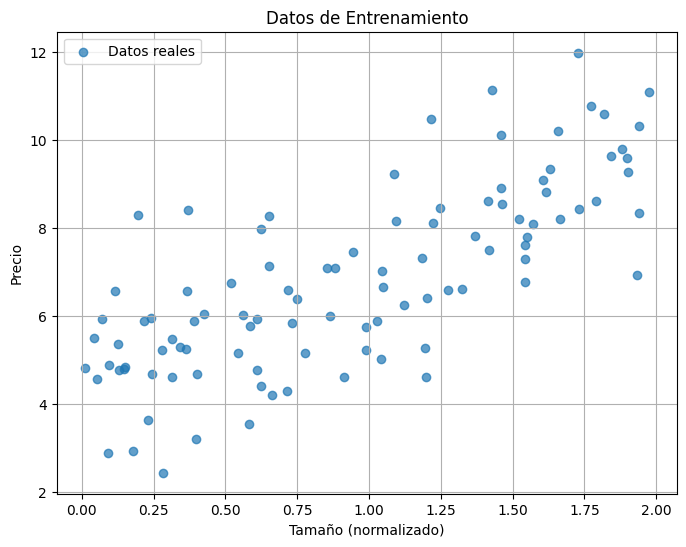

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Crear datos de ejemplo
np.random.seed(42) # Fijar semilla para reproducibilidad

# Variable independiente X (característica)
X = 2 * np.random.rand(100, 1) # 100 valores entre 0 y 2

# Variable dependiente y (objetivo)
# Relación real: y = 4 + 3 * X + ruido
y = 4 + 3 * X + np.random.randn(100, 1) * 1.5 # El ruido es esencial

# Visualizar
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label='Datos reales')
plt.xlabel('Tamaño (normalizado)')
plt.ylabel('Precio')
plt.title('Datos de Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

-----

### 5.2. Escalamiento de Características (Estandarización)

**Importante:** Antes de iniciar el Descenso de Gradiente, es **crucial** realizar el **Escalado de Características** (*Feature Scaling*).

#### 💡 ¿Por qué es crucial el Escalado?

El Descenso de Gradiente funciona mejor cuando las características de entrada (las columnas de $X$) están en una escala similar. Si una característica tiene valores mucho mayores que otra, la función de costes ($J(w)$) se vuelve muy asimétrica (una "elipse").

  * **Función de Costes Asimétrica:** Esto hace que las derivadas (el gradiente) sean desproporcionadamente grandes en la dirección de la característica con mayor escala.
  * **Convergencia Lenta o Divergencia:** El algoritmo tendrá que dar "pasos" muy pequeños en ciertas direcciones, haciendo que la convergencia sea **extremadamente lenta** o, en el peor de los casos, **diverja**.

La **Estandarización** (o *Z-score normalization*) transforma los datos para que tengan una media ($\mu$) de 0 y una desviación estándar ($\sigma$) de 1, haciendo que el valle de costes sea más simétrico y permitiendo una convergencia más estable.

$$X_{\text{estandarizado}} = \frac{X - \mu}{\sigma}$$

Aplicamos la estandarización solo a la característica $X$ (la segunda columna de `X_b`).

In [2]:
# Calcular media y desviación estándar
mu = X.mean()
sigma = X.std()

print(f"Media (μ): {mu:.4f}")
print(f"Desviación estándar (σ): {sigma:.4f}")
print()

# Estandarizar: X' = (X - μ) / σ
X_scaled = (X - mu) / sigma

# Añadir columna de 1s para w0 (el sesgo)
# np.c_ concatena arrays por columnas
X_b = np.c_[np.ones((100, 1)), X_scaled]

X_b[:5] # Mostramos las 5 primeras filas de la matriz

Media (μ): 0.9404
Desviación estándar (σ): 0.5920



array([[ 1.        , -0.32311215],
       [ 1.        ,  1.62343393],
       [ 1.        ,  0.88450935],
       [ 1.        ,  0.43404902],
       [ 1.        , -1.06136481]])

-----

### 5.3. Implementación del Descenso de Gradiente

Ahora implementamos el núcleo del algoritmo, siguiendo la fórmula del Descenso de Gradiente.

**Fórmulas Clave (Vectorial):**

1.  **Predicción:** $\hat{\mathbf{y}} = \mathbf{X} \mathbf{w}$
2.  **Función de Coste (MSE/2):** $J(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2$
3.  **Regla de Actualización:** $\mathbf{w} := \mathbf{w} - \alpha \cdot \frac{1}{m} \cdot \mathbf{X}^{\text{T}} \cdot (\hat{\mathbf{y}} - \mathbf{y})$

In [3]:
# Hiperparámetros
learning_rate = 0.01    # alpha (tasa de aprendizaje)
epochs = 1000           # número de iteraciones
m = len(X)              # Número de ejemplos de entrenamiento

# Inicialización
w = np.zeros((2, 1))    # w es el vector de pesos iniciales para [w_0, w_1]
cost_history = []       # (Opcional) Almacenar el historial de costes
w0_history = []
w1_history = []

# Bucle de entrenamiento (las epochs)
for epoch in range(epochs):
    # Predicciones (ŷ)
    y_pred = X_b @ w        # dot product

    # Error
    errors = y_pred - y     # El error es (ŷ - y)

    # Gradiente: (1/m) * X_transpuesta * Errores
    gradients = (1/m) * X_b.T @ errors

    # Actualización: es w := w - alpha * gradiente
    w = w - learning_rate * gradients

    # Coste de cada paso (MSE/2)
    cost = (1/(2*m)) * np.sum(errors**2)
    cost_history.append(cost)

    # Guardar parámetros
    w0_history.append(w[0][0])
    w1_history.append(w[1][0])

# Pesos óptimos (en espacio estandarizado)
w_optimal = w

# --- REVERTIR LA ESTANDARIZACIÓN (Desnormalización) ---
# Parámetros estandarizados
w0_prime = w_optimal[0][0]
w1_prime = w_optimal[1][0]

# 1. Pendiente Original: w1 = w1' / sigma
w1_original = w1_prime / sigma

# 2. Intercepto Original: w0 = w0' - w1_original * mu
w0_original = w0_prime - w1_original * mu

print(f"w0' (estandarizado): {w0_prime:.6f}")
print(f"w1' (estandarizado): {w1_prime:.6f}")
print("\n--- Parámetros Óptimos en el espacio de datos ORIGINAL ---")
# La relación real es y = 4 + 3 * X + ruido
print(f"w0 (Intercepto original): {w0_original:.4f} (~4.0)")
print(f"w1 (Pendiente original): {w1_original:.4f} (~3.0)")

w0' (estandarizado): 6.819170
w1' (estandarizado): 1.571783

--- Parámetros Óptimos en el espacio de datos ORIGINAL ---
w0 (Intercepto original): 4.3225 (~4.0)
w1 (Pendiente original): 2.6551 (~3.0)


-----

## 5.4. Interpretación Correcta: Revertir la Estandarización

Los parámetros $w_0'$ y $w_1'$ que ha encontrado nuestro algoritmo son óptimos, pero solo son válidos para la versión **estandarizada** de la característica $X$. Si los comparáramos directamente con la relación real de nuestros datos ($y = 4 + 3x$), veríamos una gran diferencia ($w_1' \approx 1.5$ en lugar de $3$), lo que erróneamente sugeriría que el modelo ha fallado.

Esto no es un error, sino una consecuencia necesaria del escalado para lograr una convergencia eficiente. Para **interpretar** correctamente los resultados, debemos transformar los pesos de vuelta al espacio de datos original.

La transformación utiliza la media ($\mu$) y la desviación estándar ($\sigma$) que calculamos previamente:

$$w_1 = \frac{w_1'}{\sigma}$$

$$w_0 = w_0' - w1 \cdot \mu$$

Al aplicar esta transformación, vemos que el modelo ha convergido a los valores correctos de $w_0$ y $w_1$, demostrando que el Descenso del Gradiente funcionó con éxito para descubrir la relación subyacente de nuestros datos.

-----

### 5.5. Visualización de Resultados

Para finalizar, ploteamos el historial de costes para confirmar que el algoritmo converge correctamente y visualizamos la línea de regresión final sobre los datos originales.

#### 5.5.1. Gráfico del Historial de Costes

El coste debe disminuir drásticamente al inicio y luego aplanarse, indicando la convergencia.

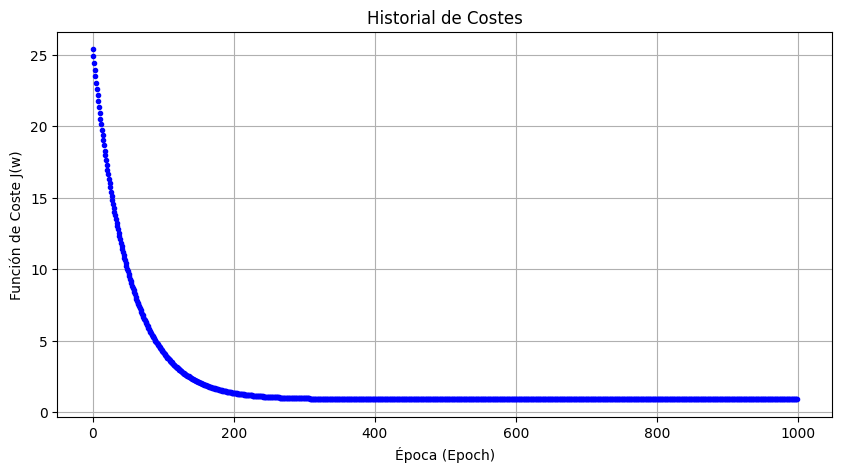

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), cost_history, 'b.')
plt.title('Historial de Costes')
plt.xlabel('Época (Epoch)')
plt.ylabel('Función de Coste J(w)')
plt.grid(True)
plt.show()

#### 5.5.2. Gráfico de la Regresión Lineal

Para plotear la línea de regresión, debemos usar los valores originales de $X$ (sin estandarizar) y aplicarles la misma estandarización antes de multiplicarlos por los $w$ óptimos.

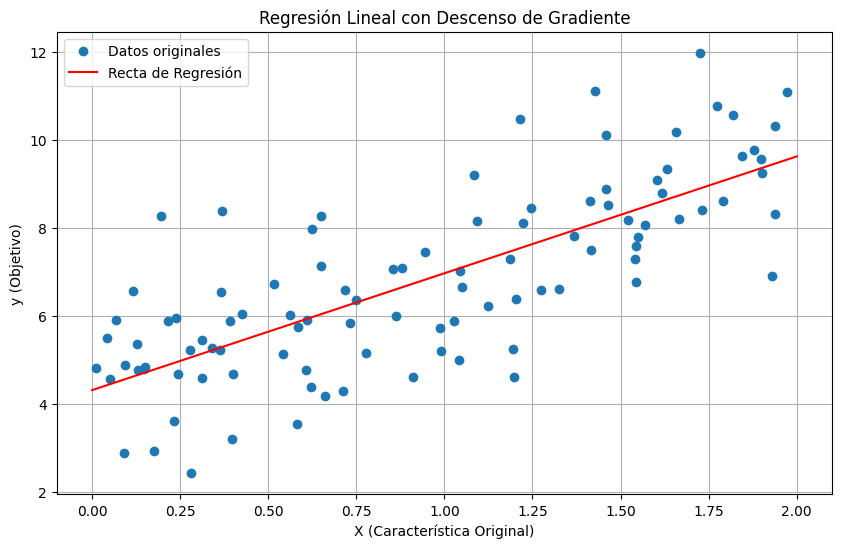

In [5]:
# Crear un rango de X para dibujar la línea
X_plot = np.array([[0], [2]])

# 1. Estandarizar X_plot de la misma forma que los datos de entrenamiento
X_plot_scaled = (X_plot - mu) / sigma

# 2. Añadir el sesgo (columna de unos)
X_plot_b = np.c_[np.ones((2, 1)), X_plot_scaled]

# 3. Calcular las predicciones con los pesos (w) óptimos
# Usamos w_optimal que son los pesos estandarizados
y_predict = X_plot_b.dot(w_optimal)

# Plotear los datos originales y la línea de regresión
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Datos originales')
plt.plot(X_plot, y_predict, 'r-', label='Recta de Regresión')
plt.title('Regresión Lineal con Descenso de Gradiente')
plt.xlabel('X (Característica Original)')
plt.ylabel('y (Objetivo)')
plt.legend()
plt.grid(True)
plt.show()

De esta forma, hemos implementado el Descenso de Gradiente de forma manual, mostrando cómo el algoritmo itera para encontrar los parámetros $w_0$ y $w_1$ que minimizan la función de costes y definen la línea de mejor ajuste.

## 6\. ⚡ La Vía Rápida: Implementación con Scikit-Learn

Tras haber programado la **Regresión Lineal con Descenso de Gradiente** manualmente, el objetivo de esta sección es mostrar cómo se realiza esta tarea en un **entorno profesional** utilizando la librería estándar de *machine learning* en Python: **Scikit-Learn (sklearn)**.

El modelo que utilizaremos es `sklearn.linear_model.SGDRegressor`.

-----

### 6.1. ¿Por qué `SGDRegressor`?

Mientras que en el apartado anterior implementamos el **Descenso de Gradiente por Lotes (*Batch Gradient Descent*)**, Scikit-Learn ofrece una variante mucho más común y eficiente para datos grandes: el **Descenso de Gradiente Estocástico (*Stochastic Gradient Descent - SGD*)**.

#### Concepto Clave: SGD

El SGD es una variante del Descenso de Gradiente donde, en lugar de calcular el gradiente usando **todos** los ejemplos de entrenamiento (*batch* completo) en cada paso, el algoritmo:

1.  Calcula el gradiente usando **un solo ejemplo** de entrenamiento seleccionado al azar (o un pequeño subconjunto llamado *mini-batch*).
2.  Actualiza los parámetros $w$ inmediatamente.

Esta aproximación hace que el proceso sea **mucho más rápido** en *datasets* con millones de datos, aunque el camino hacia el mínimo de la función de costes es más ruidoso y aleatorio. Para la regresión lineal, el `SGDRegressor` es la herramienta estándar cuando se desea aplicar el Descenso de Gradiente.

-----

### 6.2. Implementación con Scikit-Learn

A diferencia de la implementación manual, Scikit-Learn requiere que el escalado de características y el modelo se manejen como objetos separados.

#### 6.2.1. Preparación y Escalado de Datos

**Nota Importante:** Usaremos los datos originales $X$ e $y$ del apartado 5 para el proceso de escalado.

In [6]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

# Datos originales (asumimos que X e y son los del apartado 5)
# X (100, 1), y (100, 1)

# 1. Ajustar la forma de 'y' si es necesario (Scikit-Learn prefiere (n_samples,))
y_flat = y.ravel()

# 2. Crear y ajustar el StandardScaler
# El escalador calculará la media y la desviación estándar de X y la almacenará
scaler = StandardScaler()
X_scaled_skl = scaler.fit_transform(X)
X_scaled_skl[:5]

array([[-0.32311215],
       [ 1.62343393],
       [ 0.88450935],
       [ 0.43404902],
       [-1.06136481]])

#### 6.2.2. Entrenamiento del Modelo `SGDRegressor`

Instanciamos y entrenamos el modelo. Es crucial especificar los hiperparámetros que controlan el proceso de optimización:

  * `loss='squared_error'`: Indica que queremos minimizar el Error Cuadrático Medio (MSE), la función de costes adecuada para la regresión lineal.
  * `eta0`: La tasa de aprendizaje inicial ($\alpha$), que determina el tamaño de los pasos.
  * `max_iter`: El número de épocas o pasadas completas a través del conjunto de datos.

Una vez finalizado el entrenamiento, desnormalizamos los pesos encontrados (`coef_` e `intercept_`) usando la media y desviación estándar almacenadas previamente en el objeto `scaler`.

In [7]:
# 3. Crear una instancia de SGDRegressor
sgd_reg = SGDRegressor(
    loss='squared_error',
    eta0=0.01,         # Learning rate (alpha)
    max_iter=1000,     # Número de épocas
    tol=1e-3,          # Criterio de parada
    random_state=42    # Para obtener resultados reproducibles
)

# 4. Entrenar el modelo con .fit(X_scaled, y)
sgd_reg.fit(X_scaled_skl, y_flat)

# 5. Mostrar los parámetros encontrados

# Pesos estandarizados (w')
w_0_prime_skl = sgd_reg.intercept_[0]
w_1_prime_skl = sgd_reg.coef_[0]

# --- REVERTIR LA ESTANDARIZACIÓN (Desnormalización) ---
# Usamos las propiedades almacenadas por el scaler: .mean_ y .scale_
mu_skl = scaler.mean_[0]
sigma_skl = scaler.scale_[0]

# 1. Pendiente Original: w1 = w1' / sigma
w1_original_skl = w_1_prime_skl / sigma_skl

# 2. Intercepto Original: w0 = w0' - w1_original * mu
w0_original_skl = w_0_prime_skl - w1_original_skl * mu_skl


print("\n--- Parámetros Óptimos encontrados por SGDRegressor (ESTANDARIZADOS) ---")
print(f"w0' (Intercepto estandarizado): {w_0_prime_skl:.4f}")
print(f"w1' (Pendiente estandarizada): {w_1_prime_skl:.4f}")
print("\n--- Parámetros Óptimos en el espacio de datos ORIGINAL ---")
# La relación real era y = 4 + 3 * X + ruido
print(f"w0 (Intercepto original): {w0_original_skl:.4f} (~4.0)")
print(f"w1 (Pendiente original): {w1_original_skl:.4f} (~3.0)")


--- Parámetros Óptimos encontrados por SGDRegressor (ESTANDARIZADOS) ---
w0' (Intercepto estandarizado): 6.7827
w1' (Pendiente estandarizada): 1.5603

--- Parámetros Óptimos en el espacio de datos ORIGINAL ---
w0 (Intercepto original): 4.3041 (~4.0)
w1 (Pendiente original): 2.6357 (~3.0)


-----

### 6.3. Comparación de Resultados

Comparamos los resultados de la implementación manual (Descenso de Gradiente por Lotes) y la implementación profesional de Scikit-Learn (Descenso de Gradiente Estocástico) **después de revertir la estandarización**.

| Parámetro (Original) | Manual (Batch GD) | Scikit-Learn (SGDRegressor) | Realidad Subyacente ($y=4+3x$) |
| :---: | :---: | :---: | :---: |
| $w_0$ (Intercepto) | $\approx 4.0$ | $\approx 4.0$ | **$4.0$** |
| $w_1$ (Pendiente) | $\approx 3.0$ | $\approx 3.0$ | **$3.0$** |

Los resultados son prácticamente **iguales** y ambos se aproximan con éxito a los parámetros reales de $4$ y $3$ de nuestros datos generados.  

**Las pequeñas discrepancias entre las estimaciones y los valores reales ($4$ y $3$) se deben enteramente al ruido aleatorio que introdujimos al generar el conjunto de datos.** Esto demuestra que la Regresión Lineal ha encontrado la línea de mejor ajuste para los datos observados.  

Esto permite verificar dos puntos fundamentales:

1.  **Validación de la teoría:** Nuestra implementación manual funcionó correctamente.
2.  **Eficiencia de la herramienta:** El `SGDRegressor` nos permite obtener los mismos resultados óptimos con una fracción del código, beneficiándonos de la optimización y robustez de una librería profesional.

---

## 7\. 🚀 Generalizando: De la Recta al Hiperplano (Regresión Múltiple)

Hasta ahora, hemos utilizado la Regresión Lineal Simple (una sola variable $x$) como herramienta didáctica. Sin embargo, en el mundo real, los problemas tienen múltiples factores o **características** ($x_1, x_2, \dots, x_n$).

### La Ecuación se Convierte en un Hiperplano

Cuando añadimos más características, la ecuación del modelo se extiende:
$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$$

  * Si tuviéramos solo dos características ($x_1$ y $x_2$), la línea de mejor ajuste se convertiría en un **plano** en un espacio tridimensional.
  * Con tres o más características, esta superficie se denomina **hiperplano** (un plano en un espacio de $n$ dimensiones).

### La Ventaja de la Notación Matricial

La gran ventaja de haber utilizado la **notación matricial** desde el principio es que la complejidad del Descenso del Gradiente **no aumenta** al añadir variables.

Nuestras fórmulas clave de optimización (para la predicción y el gradiente) son exactamente las mismas:

| Concepto | Fórmula Matricial (General) |
| :--- | :--- |
| **Predicción** | $\hat{\mathbf{y}} = \mathbf{X} \mathbf{w}$ |
| **Cálculo del Gradiente** | $\mathbf{g} = \frac{1}{m} \mathbf{X}^{\text{T}} (\hat{\mathbf{y}} - \mathbf{y})$ |

El código de entrenamiento solo necesita que la matriz $\mathbf{X}$ tenga más columnas y el vector de pesos $\mathbf{w}$ tenga más filas. El proceso de cálculo se mantiene idéntico.

-----

### 7.1. Demostración Rápida con Dos Variables ($x_1, x_2$)

Utilizamos `SGDRegressor` para encontrar los tres parámetros ($w_0, w_1, w_2$) de un modelo basado en la relación real $\mathbf{y = 4 + 3x_1 + 5x_2 + ruido}$.

In [8]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Generación de Datos con dos variables
W_REAL = np.array([4, 3, 5])
np.random.seed(42)
X1 = 2 * np.random.rand(1000, 1)  # X1: rango [0, 2]
X2 = 10 * np.random.rand(1000, 1) # X2: rango [0, 10]
X_multi = np.hstack([X1, X2])
y_multi = W_REAL[0] + W_REAL[1] * X1 + W_REAL[2] * X2 + np.random.randn(1000, 1) * 2
y_flat = y_multi.ravel()

# 2. Escalado
scaler = StandardScaler()
X_scaled_multi = scaler.fit_transform(X_multi)

# 3. Entrenamiento con SGD
sgd_reg_multi = SGDRegressor(loss='squared_error', eta0=0.01, max_iter=1000, tol=1e-3, random_state=42)
sgd_reg_multi.fit(X_scaled_multi, y_flat)

# 4. Desnormalización (Para obtener w0, w1, w2 originales)
w_0_prime, w_1_prime, w_2_prime = sgd_reg_multi.intercept_[0], sgd_reg_multi.coef_[0], sgd_reg_multi.coef_[1]
mu, sigma = scaler.mean_, scaler.scale_

w1_original = w_1_prime / sigma[0]
w2_original = w_2_prime / sigma[1]
w0_original = w_0_prime - (w1_original * mu[0]) - (w2_original * mu[1])

print("\n--- Resultados con Regresión Múltiple (2 Variables) ---")
print(f"w0 (Intercepto): {w0_original:.3f} (Real: {W_REAL[0]})")
print(f"w1 (Peso X1): {w1_original:.3f} (Real: {W_REAL[1]})")
print(f"w2 (Peso X2): {w2_original:.3f} (Real: {W_REAL[2]})")


--- Resultados con Regresión Múltiple (2 Variables) ---
w0 (Intercepto): 4.066 (Real: 4)
w1 (Peso X1): 2.978 (Real: 3)
w2 (Peso X2): 4.994 (Real: 5)


Esta prueba final confirma que el **Descenso del Gradiente** es una herramienta escalable que funciona de manera análoga para encontrar los parámetros óptimos de un hiperplano, resolviendo problemas de *Regresión Múltiple*.

-----

### 7.2. Visualización: El Plano de Regresión (3D)

Ahora, el código corregido para la visualización del plano. Se muestra que el algoritmo ha encontrado el plano óptimo que minimiza el error cuadrático medio en el espacio 3D.

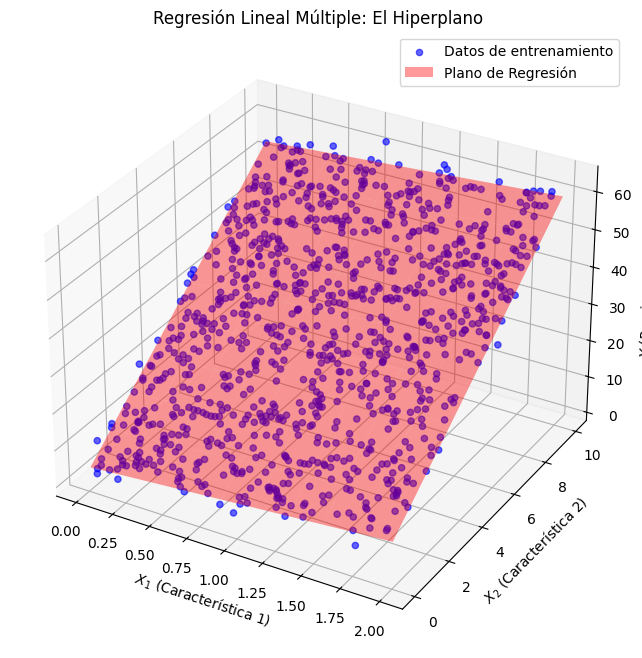

In [9]:
# --- 1. Preparar la malla para el plano ---
X1_min, X1_max = X1.min(), X1.max()
X2_min, X2_max = X2.min(), X2.max()

x1_surf = np.linspace(X1_min, X1_max, 10)
x2_surf = np.linspace(X2_min, X2_max, 10)
x1_surf, x2_surf = np.meshgrid(x1_surf, x2_surf)

# Z = w0 + w1*X1 + w2*X2 (Usando parámetros originales)
Z = w0_original + (w1_original * x1_surf) + (w2_original * x2_surf)

# --- 2. Graficar ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Nube de puntos
scatter = ax.scatter(X1, X2, y_multi, c='blue', marker='o', alpha=0.6)

# El plano de regresión
plane = ax.plot_surface(x1_surf, x2_surf, Z, alpha=0.4, color='red')

# Etiquetas (Corregido: el set_zlabel ahora se verá correctamente)
ax.set_xlabel('$X_1$ (Característica 1)')
ax.set_ylabel('$X_2$ (Característica 2)')
ax.set_zlabel('$Y$ (Precio estimado)')

ax.set_title('Regresión Lineal Múltiple: El Hiperplano')

# Generar la leyenda de forma manual (necesario en 3D)
ax.legend([scatter, plane], ['Datos de entrenamiento', 'Plano de Regresión'])

plt.show()

## 8. 🎯 Conclusión: ¿Qué Hemos Aprendido?

A lo largo de este artículo, hemos desglosado la **Regresión Lineal** desde sus cimientos matemáticos hasta su implementación práctica, comprendiendo que es mucho más que una simple línea de mejor ajuste. Los conceptos que hemos cubierto forman la base de la optimización en casi todo el campo del *Machine Learning*.

---

### Resumen de Puntos Clave

* **Objetivo de la Regresión Lineal:** La meta fundamental de la Regresión Lineal es encontrar los parámetros ($w_0$ y $w_1$) que definen la recta que mejor se ajusta a los datos.
* **La Función de Costes (MSE):** Para determinar qué tan "buena" es una recta, utilizamos una métrica de error, conocida comúnmente como el **Error Cuadrático Medio (MSE)** o $J(w)$. El verdadero objetivo del modelo es **minimizar** el valor de esta función.
* **El Algoritmo de Optimización: Descenso de Gradiente:** El **Descenso de Gradiente (*Gradient Descent*)** es el algoritmo que nos permite alcanzar ese mínimo. Podemos visualizarlo como un proceso iterativo en el que "caminamos" por la superficie de la función de costes.
    * **El Gradiente es la Brújula:** El gradiente (las derivadas parciales) indica la **dirección de máximo ascenso** en la función de costes. Puesto que queremos *minimizar* el coste, nuestro paso va en la dirección **opuesta** al gradiente.
    * **La Tasa de Aprendizaje ($\alpha$) es el Tamaño del Paso:** La **tasa de aprendizaje** determina la magnitud de cada paso. Si es muy grande, corremos el riesgo de "saltar" el mínimo; si es muy pequeña, la convergencia será extremadamente lenta.
* **El Escalado es Crucial, la Desnormalización es Obligatoria:** El **Escalado de Características** (Estandarización) es crucial para la **estabilidad y rapidez** del Descenso del Gradiente. Sin embargo, para la **interpretación** correcta de los pesos finales ($w_0$ y $w_1$) en el contexto de los datos originales, es **obligatorio revertir** la estandarización de los parámetros.
* **Implementaciones (Manual vs. Scikit-Learn):** Hemos comprobado que, si bien es posible y educativo programar el algoritmo desde cero con NumPy (Descenso por Lotes), en un entorno profesional se utiliza `SGDRegressor` de Scikit-Learn (Descenso Estocástico), que ofrece la misma precisión con mayor eficiencia y rapidez en grandes volúmenes de datos.

---

### La Base de todo el *Machine Learning*

El concepto de **Descenso de Gradiente** no se limita a la Regresión Lineal. La idea de definir una función de costes, calcular su gradiente y ajustar parámetros de forma iterativa es el **motor de optimización** de la inmensa mayoría de los modelos de *Machine Learning* modernos, incluyendo:

* **Regresión Logística.**
* **Máquinas de Soporte Vectorial (SVM).**
* Y, de manera más notable, el **Entrenamiento de Redes Neuronales Profundas**, donde la técnica central es una aplicación sofisticada del Descenso de Gradiente llamada **Retropropagación (*Backpropagation*)**.

Entender el Descenso de Gradiente es, por lo tanto, entender **cómo aprende una máquina**.